<a href="https://colab.research.google.com/github/KruglikovAnton/customer_attrition/blob/master/Coursework_MLv_6_after_correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

In [ ]:
from pathlib import Path
p = Path('/data')
p.mkdir(parents=True, exist_ok=True)
import gdown
url='https://drive.google.com/uc?id=1l5lPCN-SLutCkI7TFqoU8XUglQOSn_-H'
output = '/data/data.zip'
gdown.download(url, output)
!unzip '/data/data.zip' -d '/data/'

Downloading...
From: https://drive.google.com/uc?id=1l5lPCN-SLutCkI7TFqoU8XUglQOSn_-H
To: /data/data.zip
100%|██████████| 158k/158k [00:00<00:00, 50.2MB/s]

Archive:  /data/data.zip
   creating: /data/data/
  inflating: /data/data/telecom_users.csv  


# 1. Описание данных

In [ ]:
### YOUR CODE HERE ###
import pandas as pd
import missingno as msno
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import tensorflow as tf
#Загрузим основной датасет
main_df = pd.read_csv('/data/data/telecom_users.csv')
main_df.head(5)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [ ]:
#Сразу же посмотрим на соотношение значений целевой переменной
main_df.Churn.value_counts()

No     4399
Yes    1587
Name: Churn, dtype: int64

In [ ]:
#В долях
main_df.Churn.value_counts(normalize=True)

No     0.734881
Yes    0.265119
Name: Churn, dtype: float64

Как видим, выборка не сбалансирована, доля ушедших клиентов составляет **26.5%**, это следует учитывать при построении моделей

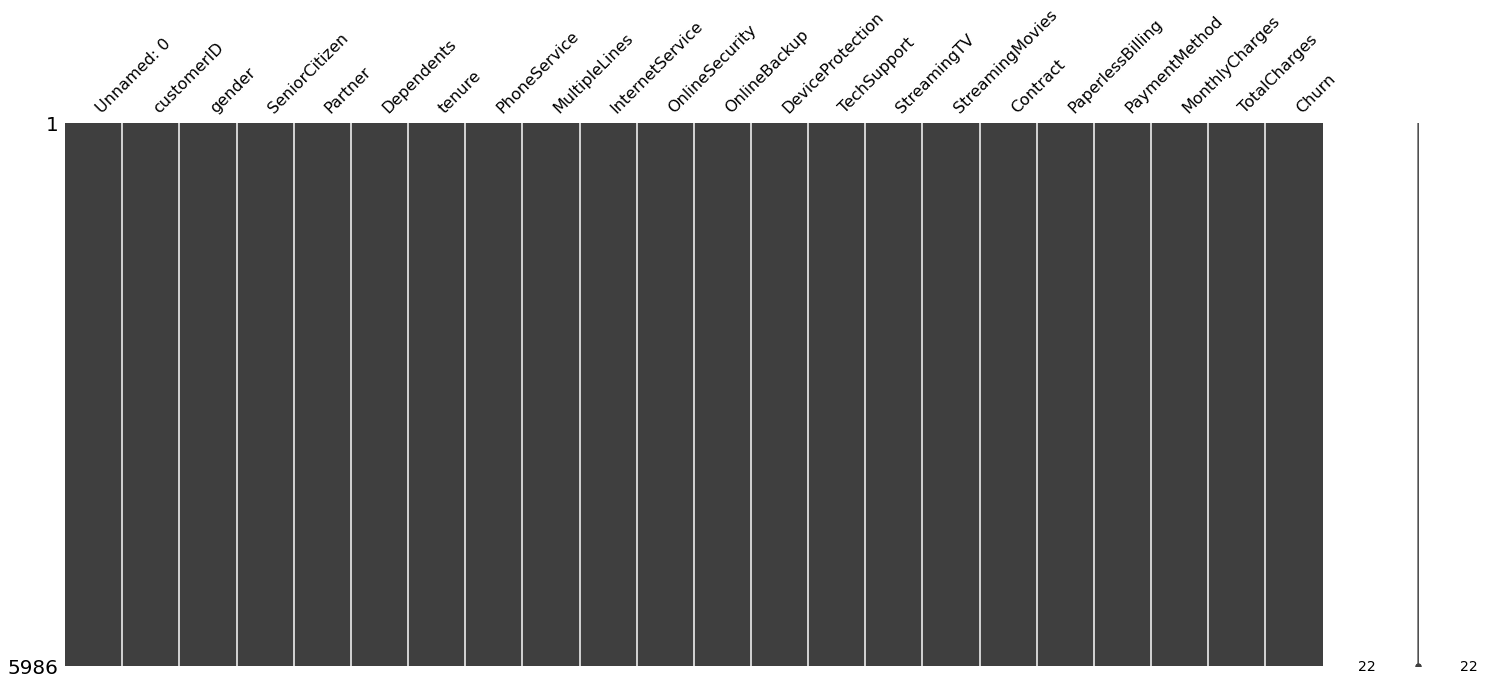

In [ ]:
#Проверим признаки на наличие nan
msno.matrix(main_df)
plt.show()

In [ ]:
#Как видим, один из столбцов остался без имени, выведем описание данных этого столбца
main_df['Unnamed: 0'].describe()

count    5986.000000
mean     3533.561310
std      2035.705666
min         0.000000
25%      1777.250000
50%      3546.500000
75%      5291.750000
max      7042.000000
Name: Unnamed: 0, dtype: float64

Пока что сложно предположить, что этот признак мог бы обозначать. Оставлять его или нет можно будет решить после проверки корреляции данного признака с другими, а также проверки его влияния на результат.

In [ ]:
#Посмотрим из каких типов состоят данные датасета
main_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


Столбец TotalCharges, должен содержать общую сумму, заплаченную клиентом, однако тип данных данного столбца object, что означает что данные могут быть в текстовом формате, либо содержать ошибочные значения

In [ ]:
#Проанализируем значения в столбце, также добавим столбец tenure 
main_df[['tenure','TotalCharges']].sort_values('tenure')

,tenure,TotalCharges
5382,0,
634,0,
356,0,
5375,0,
5951,0,
...,...,...
4228,72,7422.1
1538,72,8425.3
4234,72,7732.65
5624,72,7962.2


Помимого того, что часть данных представлена в строковом формате, данные, которые соответствуют недавно пришедшим клиентам (у которых tenure = 0) содержат ' '.

In [ ]:
#Сделаем данный столбец численным
main_df['TotalCharges'] = main_df['TotalCharges'].apply(lambda x: float(x) if x != ' ' else 0)

In [ ]:
#Проанализируем числовые данные
main_df.describe(include = [np.number])

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000
mean,3533.561310,0.161377,32.468760,64.802213,2294.221559
std,2035.705666,0.367909,24.516391,30.114702,2274.164124
min,0.000000,0.000000,0.000000,18.250000,0.000000
25%,1777.250000,0.000000,9.000000,35.650000,401.587500
50%,3546.500000,0.000000,29.000000,70.400000,1408.575000
75%,5291.750000,0.000000,56.000000,89.900000,3841.500000
max,7042.000000,1.000000,72.000000,118.750000,8684.800000


In [ ]:
#Проанализируем категориальные данные
main_df.describe(include = [object])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986
unique,5986,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7010-BRBUU,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3050,3082,4195,5396,2848,2627,2982,2605,2640,2960,2389,2356,3269,3528,2006,4399


В таблице присутствует много признаков, которые касаются только клиентов с подключенным интернетом, выведем описание отдельно для данной категории

In [ ]:
main_df[main_df['InternetService'] != 'No'].describe(include = [object])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,4695,4695,4695,4695,4695,4695,4695,4695,4695,4695,4695,4695,4695,4695,4695,4695,4695
unique,4695,2,2,2,2,3,2,2,2,2,2,2,2,3,2,4,2
top,9688-YGXVR,Male,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,2386,2420,3452,4105,2254,2627,2982,2605,2640,2960,2389,2356,2831,3158,1901,3207


### Основные выводы

#### Категориальный данные:
- Таблица содержит данные о почти **6000** клиентах;
- Разделение клиентов на **женчин** и **мужчин**, а также на тех кто **состоит в браке** и **нет** примерно **равное**;
- Клиетов **без иждевенцов** несколько **больше** чем с;
- **Большинство** клиентов пользуются услугой **телефонной связи**;
- **Половина** клиентов подключили **несколько линий телефонной связи**;<p>
#### Клиенты которые пользуются интеренетом от данного поставщика:
    <p>
- Чуть **менее половины** из клиентов используют **оптоволокно**;
- **Больше половины** клиентов **не пользуется** услугой **онлайн-безопасности**;
- **Менее половины** клиентов **подключили** услугу **online backup**;
- **Более половины** **не имеют страховки** оборудования и технической поддержки;
- Около **половины** клиентов **подключили** услуги **стримингового телевидения и стримингового кинотеатра**
- **Более половины** клиентов предпочитают **ежемесячный платеж**
- **Более половины** клиентов пользуются **безбумажным биллингом** и предпочитают рассчитываться **электронным чеком**

#### Числовые данные:
- В среднем **срок пользования** клиентом услугами составляет порядка **30 месяцев**, при **максимальном** значении **72 месяца**
- Существует довольно **большой разброс** в значениях **текущего месячного платежа** от 18 до 120 т.е. более чем в 10 раз. 
- TotalCharges также имеет сильный разброс, который связан с разбросом в ежемесячной плате и разбросом в сроке пользования.

# 2. Исследование зависимостей и формулирование гипотез

### 2.1 Исследуем числовые признаки

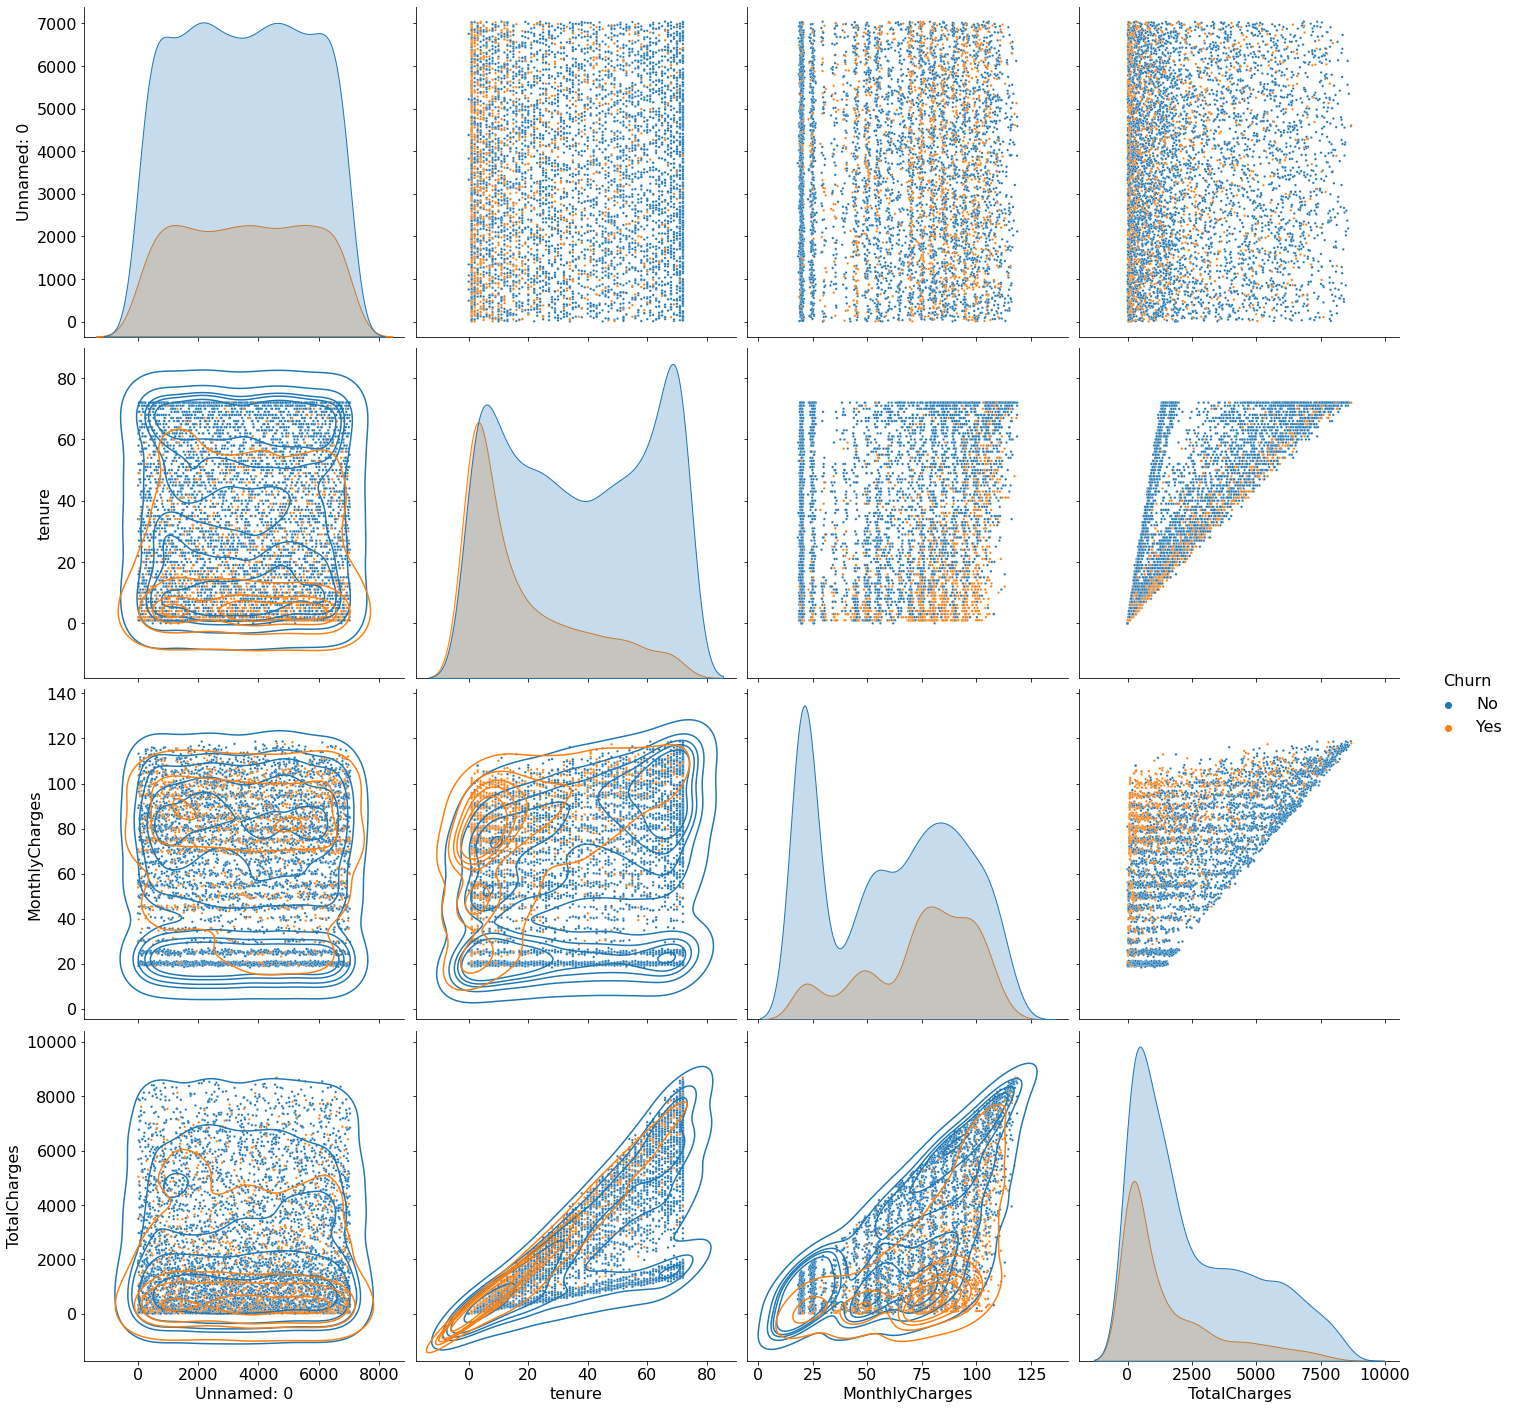

In [ ]:
#Построим парные диаграммы рассеяния для всех числовых признаков, отделяя при этом на графике ушедших и оставшихся
#клиентов разными цветами
plt.rcParams['font.size'] = 16
g = sns.pairplot(main_df[['Unnamed: 0','tenure','MonthlyCharges','TotalCharges','Churn']], hue = 'Churn', kind='scatter', corner=False, diag_kind='kde', 
            plot_kws = dict(s=6), aspect=1, height=5)
g.map_lower(sns.kdeplot, levels=6, color='.2')

Анализируя диаграммы рассеяния можно сделать следующие выводы:
1) Плотностные диаграммы признаков Unnamed: 0 и TotaCharges имеют схожее распределение для ушедших и оставшихся клиентов. В плотностной диаграмме признака tenure для оставшихся пользователей в распределении наблюдается 2 пика при малых значениях и при высоких, в то время как распределение для ушедших клиентов отличается - содержит 1 пик только для малых значений. Для признака MonthlyCharges при малых значениях данного признака число пользователей максмально, в то время как относительное число ушедших пользователей гораздо ниже, а в области средних и высоких значений, данные распределения схожи.

2) В парных же диаграммах рассеяния практически везде видны различные распределения для ушедших и оставшихся клиентов, их стоит рассмотреть отдельно

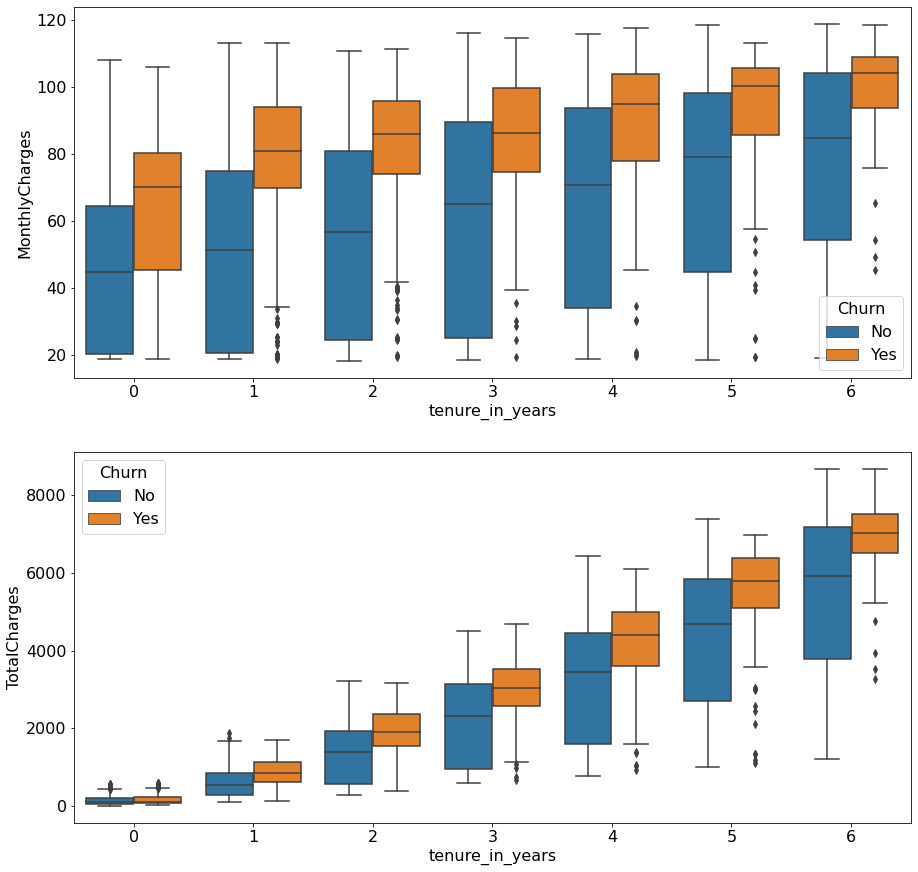

In [ ]:
#Проверим, каким образом зависит ежемесячный платеж от срока пользования услугами. 
plt.rcParams['figure.figsize'] = (15,15)
fgi, axs = plt.subplots(nrows = 2)
ax = axs[0]
main_df['tenure_in_years'] = main_df.tenure.apply(lambda x: (round(x/12)))
sns.boxplot(data = main_df, x='tenure_in_years', y='MonthlyCharges', hue= 'Churn', ax =ax)
ax = axs[1]
sns.boxplot(data = main_df, x='tenure_in_years', y='TotalCharges', hue= 'Churn', ax =ax)
plt.show()

По полученным графикам можно сделать вывод, что для различных периодов пользования чаще уходят клиенты, которые вносят более высокую месячную плату, а следовательно и более высокую суммарную.

Судя по анализу зависимостей переменной Unnamed: 0 от остальных корреляция между данным признаком с остальными числовыми не значительна. Проверим это построим матрицу корреляций.

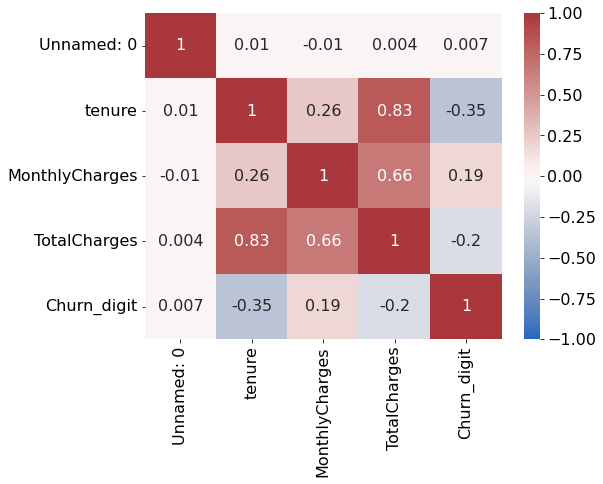

In [ ]:
#Переведем целевую переменную в численный тип
main_df['Churn_digit'] = main_df['Churn'].map({'Yes':1,'No':0})
#Построим тепловую карту матрицы корреляций
plt.rcParams['figure.figsize'] = (8,6)
sns.heatmap(main_df[['Unnamed: 0','tenure','MonthlyCharges','TotalCharges','Churn_digit']].corr().round(decimals=3),
            cmap="vlag",
            vmin=-1,
            vmax=1,
            annot=True)

Действительно, данный признак имеет наименьший коэффициент корреляции со всеми числовыми переменными.

### 2.2 Исследуем категориальные признаки

In [ ]:
main_df.describe(include = object)

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986
unique,5986,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7010-BRBUU,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3050,3082,4195,5396,2848,2627,2982,2605,2640,2960,2389,2356,3269,3528,2006,4399


In [ ]:
#Далее последовательно проверим каждый категориальный признак на связь с целевой переменной

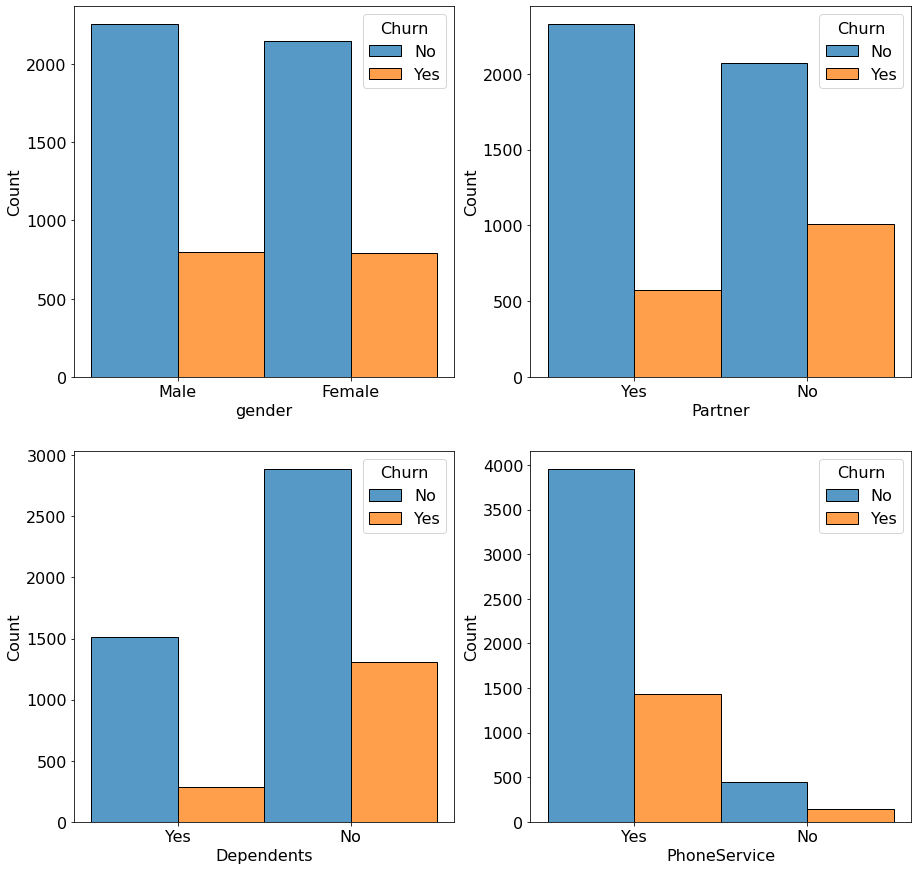

In [ ]:
#Построим гистограммы для бинарных признаков
binary_features = ['gender','Partner','Dependents','PhoneService']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (15,15))

for i, feature in enumerate(np.reshape(binary_features,(2,2))):
    ax = axs[i]
    sns.histplot(data = main_df, x=feature[0], hue='Churn', multiple = 'dodge', ax=ax[0])
    sns.histplot(data = main_df, x=feature[1], hue='Churn', multiple = 'dodge', ax=ax[1])

Предварительно можно сказать, что признаки gender и PhoneService слабо влияют на целевую переменную, в то время как влияение признаков Dependents и Partner более заметно

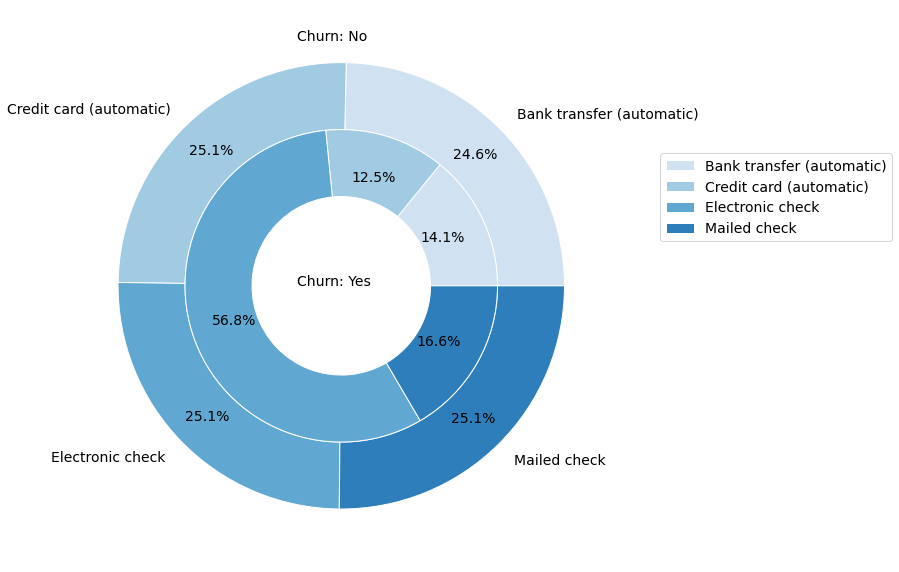

In [ ]:
#Построим круговые диаграммы для различных способов оплаты услуг
plt.rcParams['font.size'] = 14
fig, ax = plt.subplots(figsize=(10,14))
data=main_df[main_df['Churn_digit']==0].groupby(['PaymentMethod','Churn_digit'], as_index=False).count()
size = 0.3
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, 4))
patches, texts, autotexts = ax.pie(data.iloc[:,2], labels=data.PaymentMethod, radius = 1,autopct = '%1.1f%%',\
                                    wedgeprops=dict(width=0.3, edgecolor='w'),  colors=colors)

for i in range(len(autotexts)):
    x , y = autotexts[i].properties()['unitless_position']
    plt.setp(autotexts[i], x=x*1.4, y=y*1.4)
data = main_df[main_df['Churn_digit']==1].groupby(['PaymentMethod','Churn_digit'], as_index=False).count()
patches, texts, autotexts = ax.pie(data.iloc[:,2], radius=0.7, labels=None, autopct = '%1.1f%%',\
                                    wedgeprops=dict(width=0.3, edgecolor='w'), colors=colors)#, colors=colors)
for i in range(len(autotexts)):
    x , y = autotexts[i].properties()['unitless_position']
    plt.setp(autotexts[i], x=x*1.2, y=y*1.2)
ax.legend(loc='best', bbox_to_anchor=(1, 0.25, 0.5, 0.5))
ax.text(-0.2, 1.1, 'Churn: No')
ax.text(-0.2, 0.0, 'Churn: Yes')
ax.set(aspect="equal")
plt.show()

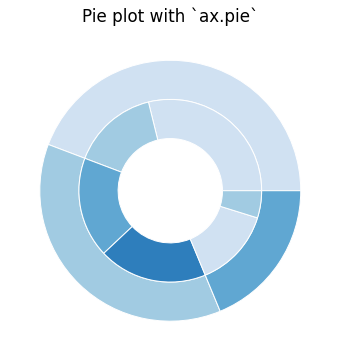

In [ ]:
fig, ax = plt.subplots()

size = 0.3
vals = np.array([[60., 32.], [37., 40.], [29., 10.]])

outer_colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, 4))
inner_colors = outer_colors

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()

Из диаграмм явно видно, что доля ушедших клиентов, предпочитающих электронный чек, значительно выделяется, в то время как среди оставшихся клиентов доли всех мтеодов примерно одинаковы. Поскльку для данного признака распределения получились различны, данный признак cтоит включить для обучения модели.

In [ ]:
#Построим гистограммы для признаков, состоящих из 3-х различных вариантов
plt.rcParams['font.size'] = 12
features_of_3 = ['InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingMovies','MultipleLines', 'Churn']
fig, axs = plt.subplots(nrows=7, ncols=1, sharex=True, figsize=(10,14))
for feature, i in zip(features_of_3, [j for j in range(7)]):
    data = main_df[features_of_3]
    ax=axs[i]
    sns.histplot(data=data, y=feature, hue='Churn', ax=ax, multiple="fill", legend=False, palette='Blues', alpha = 0.5, linewidth=0.2)
    ax.tick_params(width=0)
fig.legend(['Yes', 'No'], loc=7, title='Churn')
plt.show()

Явные различия в зависимости от того остался клиент или ушел наблюдаются практически для всех признаков за исключением MultipleLines. 

### 2.3 Преобразуем признаки

Существует несколько признаков, содержащих значения Yes, No либо No internet service, которые нужно преобразовать в 
численные значения, причем, для классификатора желательно только в 0 или 1. Для поставленной задачи
No internet service может быть выделено как отдельный признак, это позволить уменьшить кол-во возможных значений 
в рассматриваемых признаках до 2-х(0 - No или 1 - Yes), при этом мы не потеряем информацию об клиентах, 
у которых услуга доступа в интернет отсутствует.

In [ ]:
main_df['Is_internet_service'] = np.where(main_df.InternetService == 'No',0,1)
main_df[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']] = \
main_df[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']]\
.replace({'No internet service':0,'No':0, 'Yes':1})

In [ ]:
#Преобразуем оставшиеся категориальные признаки,  с помощью метода get_dummies. 
final_df = pd.get_dummies(data=main_df,columns=['MultipleLines','InternetService','Contract','PaymentMethod'])
final_df.replace({'Yes':1, 'No':0}, inplace=True)
final_df.gender=final_df.gender.replace({'Male':1, 'Female':0})
final_df.drop(columns='customerID', inplace=True)
final_df.head(5)

In [ ]:
#Настроим параметры отображения, чтобы показывались все столбцы, и выведем таблицу с коэф. корреляции
pd.set_option('display.max_columns', None)
corr_table = final_df.corr().round(decimals=3)
corr_table

In [ ]:
#Отсортируем коэффициенты корреляции целевой переменной относительно всех признаков, а также возьмем модуль от коэффициента
#корреляции, чтобы оценить ее степень
corr_table = corr_table.apply(lambda x: abs(x))
corr_table.reset_index(inplace=True)#.sort_values('Churn', inplace=True, ascending=False)
px.bar(data_frame = corr_table[~corr_table['index'].isin(['Churn', 'Churn_digit'])]\
       .sort_values('Churn'), x='Churn', y='index', orientation = 'h', height = 700,\
       labels = {'Churn':'Коэффициент корреляции', 'index':'Признак'})

Большая часть признаков имеет умеренную, слабую, либо очень слабую корреляцию. Особенно выделяются признак пола, услуги телефона и безымянной переменной.

In [ ]:
#Построим тепловую карту
plt.rcParams['figure.figsize'] = 20,15
sns.heatmap(final_df.corr(),cmap="vlag", vmin=-1, vmax=1,linewidths=.5)

Анализируя тепловую карту можно сделать вывод, что признаки gender и unnamed не только оказывают влияния на целевую переменную, но также крайне слабо коррелируют с остальными признаками, соответственно, данные признаки следует исключить. Признак наличия телефона коррелирует с некоторыми другими признаками, что может помочь моделям машинного обучения, поэтому его на данном этапе стоит оставить. Данный признак дублируется с MultipleLines_No phone service, поэтому удалим только его. 

In [ ]:
final_df.drop(columns=['Unnamed: 0','MultipleLines_No phone service','gender', 'Churn_digit'], inplace = True)

# 3. Построение моделей для прогнозирования оттока

### 3.1 Импорт библиотек и подготовка данных

In [ ]:
#Создадим глубокую копию итогового дата фрэйма, поскольку будем исследовать влияние на результат в том числе его изменение
data = final_df.copy(deep = True)

In [ ]:
#Импортируем необходимые библиотке для машинного обучения
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, GridSearchCV, cross_validate
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay,\
classification_report, auc, PrecisionRecallDisplay, f1_score, recall_score, precision_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
import eli5
from catboost import CatBoostClassifier 
import optuna
import graphviz
from lightgbm import LGBMClassifier

In [ ]:
#Выделяем целевую переменную
target = data.pop('Churn') 

In [ ]:
#Подготовим преобразованные данные для использования в соответствующих моделях, поскольку во многих
#моделях рекомендуется использовать отмасштабируемые данные, подготовим тренировочные выборки с использованием
#StandardScaler() и MinMaxScaler()
stand_scal = StandardScaler()
min_max_scal = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=17, stratify=target)
X_train_st_sc = stand_scal.fit_transform(X_train)
X_train_min_max_sc = min_max_scal.fit_transform(X_train)

## 3.2 Использование одиночных моделей

In [ ]:
#В качестве моделей будем использовать модель логистической регрессии, линейного SVC, ядерного SVC, дерево решений, 
#наивный байесовский классификатор и метод к ближайших соседей 
#Определяем модели и подготавливаем наборы параметров

lr = LogisticRegression()
lr_params = {'C': np.logspace(-1,2,4), 'random_state': [17], 'penalty':['l2'],
             'class_weight':['balanced']} #Везде, где это возможно будем использовать сбалансированный вес, т.к.
                                          #выборка не сбалансирована

lsvc = LinearSVC()
lsvc_params = {'C': np.logspace(-1,2,4), 'random_state': [17],
              'class_weight':['balanced']}

svc = SVC()
svc_params = {'C': np.logspace(-1,2,4),
              'kernel': ['rbf', 'poly'], 'degree': [2,3], 'gamma':['auto','scale'], 'random_state': [17],
              'class_weight':['balanced']}

dtc = DecisionTreeClassifier()
dtc_params = {'max_depth': range(2, 21, 2), 'max_features': range(2, 36, 2), 'random_state': [17],
              'class_weight':['balanced']}

gnb = GaussianNB()
gnb_params = {'var_smoothing': [1e-9]}

knc = KNeighborsClassifier()
knc_params = {'n_neighbors':range(1,16,2), 'weights':['uniform']}



models = [lr, lsvc, svc, dtc, gnb, knc]
models_params = [lr_params, lsvc_params, svc_params, dtc_params, gnb_params, knc_params]

In [ ]:
#Создаем экземпляр для перекрестной проверки
skf = StratifiedKFold(n_splits=10, random_state=17, shuffle = True)

In [ ]:
#Визуализируем данные в двумерных координатах, предварительно снизив размерность с помощью PCA, t-sne и SVD
#Получаем данные пониженной размерности
pca = PCA(n_components=2, random_state=17)
tsne = TSNE(n_components=2, random_state=17)
svd = TruncatedSVD(n_components=2, random_state=17)
X_pca = pca.fit_transform(X_train_min_max_sc)
X_tsne = tsne.fit_transform(X_train_min_max_sc)
X_svd = svd.fit_transform(X_train_min_max_sc)

In [ ]:
#Визуализируем
fig, axs = plt.subplots(nrows=3, ncols=1)
names=['PCA', 'T-SNE', 'SVD']
for i, X_vis in enumerate([X_pca, X_tsne, X_svd]):
    sns.scatterplot(x=X_vis[:,0], y=X_vis[:,1], ax=axs[i], hue=y_train)
    axs[i].set_title(names[i])

По построенным графикам можно сделать вывод, что при использовании PCA и SVD данные в принципе разделяются хорошо, однако присутствует много шумов, которые для поставленной задачи в принципе логичны, однако постараемся их уменьшить путем отбора признаков, которые будут вносить малый вклад в результат классификатора. T-SNE же применительно к рассматриваемому набору данных показал результат хуже.

#### Выбор метрики
Поскольку выборка
не сбалансирована, то в качестве метрики лучше roc-auc 

In [ ]:
%%time
#Используя решетчатый поиск с перекрестной проверкой подберем наилучшие параметры обучения моделей, 
#наилучшие параметры будем выбирать максимизируя полноту, однако для контроля точности также будем сохранять
#значения точности
grid_search_objs = []
for model, model_params in zip(models, models_params):
    print(model)
    if model == lr: #Используем масштабируемые с помощью StandardScaler данные
        grid_search_obj = GridSearchCV(estimator = model, param_grid = model_params, cv = skf, n_jobs=-1, scoring=['roc_auc','recall','precision'], refit='roc_auc')
        grid_search_obj.fit(X_train_st_sc, y_train)
        grid_search_objs.append(grid_search_obj)
    elif model in [lsvc, svc, gnb, knc]: #Используем масштабируемые с помощью MinMaxScaler данные
        grid_search_obj = GridSearchCV(estimator = model, param_grid = model_params, cv = skf, n_jobs=-1, scoring=['roc_auc','recall','precision'], refit='roc_auc')
        grid_search_obj.fit(X_train_min_max_sc, y_train)
        grid_search_objs.append(grid_search_obj)
    else: #В остальных моделях(дерево решений и случайны лес) масштабирование данных не требуется
        grid_search_obj = GridSearchCV(estimator = model, param_grid = model_params, cv = skf, n_jobs=-1, scoring=['roc_auc','recall','precision'], refit='roc_auc')
        grid_search_obj.fit(X_train, y_train)
        grid_search_objs.append(grid_search_obj)

In [ ]:
#Подготовим данные для визуализации
all_model_df=pd.DataFrame()
models=[]
best_roc_auc=[]
best_recalls=[]
best_precisions=[]
for grid in grid_search_objs:
    grid_df = pd.DataFrame(pd.DataFrame(grid.cv_results_))
    model = pd.Series([str(grid.estimator) for i in range(grid_df.shape[0])], name = 'models')
    grid_df['models']=model
    all_model_df =pd.concat([all_model_df,grid_df])
    models.append(grid.estimator)
    best_roc_auc.append(np.nanmax(grid.cv_results_["mean_test_roc_auc"]))
    best_recalls.append(np.nanmax(grid.cv_results_["mean_test_recall"]))
    best_precisions.append(np.nanmax(grid.cv_results_["mean_test_precision"]))
best_metrics=pd.DataFrame({'models':models,'best_roc_auc':best_roc_auc,'best_recalls':best_recalls, 'best_precisions':best_precisions})

In [ ]:
#Визуализируем максимальные значения roc_auc, полноты и точности для каждой из моделей 
models_vis=best_metrics.melt(id_vars='models',value_vars=['best_roc_auc','best_recalls','best_precisions'])
models_vis.models=models_vis.models.apply(str)
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=models_vis, x='models', y='value', hue='variable', ax=ax, alpha=0.4)
ax.tick_params(axis='x', rotation=45)
ax.set_ylabel('Значение метрики')
ax.set_ylim(0,1)
ax.set_xlabel('Модель')
ax.legend(bbox_to_anchor=(0.4, 0.4, 0.5, 0.6))
ax.set_title('Метрики, полученные в ходе кросс-валидации')
plt.show()

Как видно из результатов, большая часть классификаторов позволяют обеспечить полноту выше 0.8, при этом значение roc-auc также высоки. Стоит отметить низкие значения точности, что по возможности нужно будет исправить. 

In [ ]:
#Построим в координатах полноты и точности результаты перекрестной проверки модели для всех комбинаций параметров
fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(data=all_model_df, x='mean_test_precision', y='mean_test_recall', hue='models', ax=ax, s=25, size='mean_test_roc_auc')

Как видно из графика, для ряда моделей максимальным значениям полноты (порядка 0.8 - 0.9) соответствуют значения точности около 0.52, что в целом не так плохо, так как данные значения точности близки к максимально полученным в ходе кросс-валидации.

In [ ]:
#Визуализируем коэффициенты в линейных моделях
fig = px.bar(x=grid_search_objs[0].best_estimator_.coef_[0], y=X_train.columns, orientation='h', range_x=(-1,1), barmode='group', height=800)
fig.add_trace(go.Bar(x=grid_search_objs[1].best_estimator_.coef_[0], y=X_train.columns, orientation='h'))
fig.data[0].showlegend = True
fig.data[0].name=str(grid_search_objs[0].estimator)[:-2]
fig.data[1].name=str(grid_search_objs[1].estimator)[:-2]
fig.layout.xaxis.title.text = 'Коэффициент'
fig.layout.yaxis.title.text = 'Признаки'
fig.show()

Из графика видно, что у моделей логистической регрессии и линейного метода опорных векторов коэффициенты перед признакими довольно похожи. Явно выделяются признаки **tenure, Total charges, и признаки различных типов контрактов**. 

In [ ]:
#Построим важность признаков для дерева решений
df_dtc_results = pd.DataFrame({'Признаки':X_train.columns, 'Важность':grid_search_objs[3].best_estimator_.feature_importances_})
df_dtc_results=df_dtc_results.query('`Важность`>0').sort_values('Важность', ascending=False)
px.bar(data_frame=df_dtc_results, x='Важность', y='Признаки', title='Важность признаков дерева решений')


In [ ]:
#Также визуализируем дерево
export_graphviz(grid_search_objs[3].best_estimator_,\
                out_file="tree.dot",\
                class_names=["Churn: No", "Churn: Yes"],\
                feature_names=X_train.columns,\
                impurity=False,\
                filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Из всех признаков при построении дерева использовалось **12**, наибольшую важность имеют признаки tenure, Fiber_optic и nonth_to_month_contract

In [ ]:
#Проверим модели на тестовых данных и визуализируем метрики
recals = []
precisions = []
models_names = []
#Настраиваем график
fig, axs = plt.subplots(nrows=len(grid_search_objs), ncols=3, figsize=(18,40), gridspec_kw = {'width_ratios':[1.0,1.1,1.1]})
plt.subplots_adjust(wspace=0.3, hspace=0.3)
# plt.rcParams['figure.figsize']=8,8
#Получаем тестовые выборки с использованием ранее обученных объектов масштабирования
X_test_st_sc = stand_scal.transform(X_test)
X_test_min_max_sc = min_max_scal.transform(X_test)
scaled_models = ['LinearSVC()','SVC()','GaussianNB()','KNeighborsClassifier()']
#В цикле по каждой модели строим графики и рассчитываем метрики
for i, model in enumerate(grid_search_objs):
    model_name = str(model.estimator)
    if model_name == 'LogisticRegression()':
        Xtest_vis = X_test_st_sc
    elif model_name in scaled_models:
        Xtest_vis = X_test_min_max_sc
    else:
        Xtest_vis = X_test
    y_pred = model.predict(Xtest_vis)
    recals.append(recall_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    models_names.append(model_name)
    cmtrx = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
    cmtrx.plot(ax=axs[i][0])
    fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=model.classes_[1])
    roc_auc = auc(fpr, tpr)
    roc_display = RocCurveDisplay.from_estimator(model.best_estimator_, Xtest_vis, y_test, ax = axs[i][1])
    display = PrecisionRecallDisplay.from_estimator(model.best_estimator_, Xtest_vis, y_test,ax = axs[i][2])

На тестовых данных значение площади под кривой ошибок для классификаторов логистическая регрессия, линейный svc, svc, дерево решений составила **0.84**. Для наивного баесовского классификатора **0.83**, для метода к ближайших соседей **0.82**. Однако средняя доля правильных ответов(AP) наибольшей оказалась для svc.(**0.65**), что объясняется бОльшим кол-вом правильно определенных объектов класса 1, однако ошибочно определенных класса 1, которые на самом деле являются классом 0, также больше, откуда аналогичное значение roc-auc по сравнению с другими классификаторами.

## 3.3 Применение моделей на основе ансамблей

In [ ]:
#Подготовим модели на основе ансамбевых моделей библиотеки sklearn
base_estimator_1 = DecisionTreeClassifier(class_weight='balanced', 
                                          max_depth=1,
                                          max_features=4,
                                          random_state=17)
base_estimator_2 = DecisionTreeClassifier(class_weight='balanced', 
                                          max_depth=1,
                                          max_features=6,
                                          random_state=17)
base_estimator_3 = DecisionTreeClassifier(class_weight='balanced', 
                                          max_depth=1,
                                          max_features=8,
                                          random_state=17)
base_estimator_4 = DecisionTreeClassifier(class_weight='balanced', 
                                          max_depth=2,
                                          max_features=4,
                                          random_state=17)
base_estimator_5 = DecisionTreeClassifier(class_weight='balanced', 
                                          max_depth=2,
                                          max_features=6,
                                          random_state=17)
base_estimator_6 = DecisionTreeClassifier(class_weight='balanced', 
                                          max_depth=2,
                                          max_features=8,
                                          random_state=17)

rfc = RandomForestClassifier()
rfc_params = {'n_estimators': [50,100], 
              'max_depth': range(2, 21, 6),
              'max_features': range(2, 23, 4),
              'random_state': [17], 
              'criterion':['gini', 'entropy'],
              'class_weight':['balanced'],
              }

ada = AdaBoostClassifier()
ada_params = {'n_estimators': [100,200],
              'learning_rate': [0.01, 0.1, 1, 10, 100],
              'base_estimator' :[
                  base_estimator_1, 
                  base_estimator_2, 
                  base_estimator_3, 
                  base_estimator_4,
                  base_estimator_5,
                  base_estimator_6
              ]}

gbc = GradientBoostingClassifier()
gbc_params = {'learning_rate': [0.01, 0.1, 1, 10, 100], 
              'n_estimators': [50,100],
              'max_depth':range(2, 15, 6), 
              'min_samples_split': [2,6],
             }

In [ ]:
%%time
#Подберем наилучшие параметры используя аналогичный критерий, как и с одиночными моделями
grid_search_objs_ensembles=[]
ensemble_models = [rfc, ada, gbc]
ensemble_models_params = [rfc_params, ada_params, gbc_params]
for model, model_params in zip(ensemble_models, ensemble_models_params):
    print(model)
    grid_search_obj = GridSearchCV(estimator = model, param_grid = model_params, cv = skf, n_jobs=-1, scoring=['roc_auc','recall','precision'], refit='roc_auc')
    grid_search_obj.fit(X_train, y_train)
    grid_search_objs_ensembles.append(grid_search_obj)

In [ ]:
#Подготовим для визуализации полученные результаты 
ensemble_results=pd.DataFrame()
models_ensemble = pd.Series()
for ensemble_model in grid_search_objs_ensembles:
    ensemble_results = pd.concat([ensemble_results, pd.DataFrame(ensemble_model.cv_results_)])
    models_ensemble = pd.concat([models_ensemble, pd.Series([str(ensemble_model.estimator)[:-2] for i in range(pd.DataFrame(ensemble_model.cv_results_).shape[0])])])

In [ ]:
#Визуализируем полученные результаты
px.scatter(data_frame=ensemble_results, 
           x='mean_test_precision', 
           y='mean_test_recall', 
           color=models_ensemble,
           hover_data=['mean_fit_time'],
           size='mean_test_roc_auc', size_max=10)

Как видим наибольшего значения roc-auc (порядка **0.82-0.84**) удалось добиться с использованием всех моделей, однако модели случайного леса и adaboost показывают лучшую полноту, а модель градиентного бустинга лучшую точность.

In [ ]:
fig, axs = plt.subplots(ncols=3, nrows=3,figsize=(20,20))
for i, model in enumerate(grid_search_objs_ensembles):
    y_pred = model.predict(X_test)
#     models_names.append(model_name)
    cmtrx = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
    cmtrx.plot(ax=axs[i][0])
    fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=model.classes_[1])
    roc_auc = auc(fpr, tpr)
    roc_display = RocCurveDisplay.from_estimator(model.best_estimator_, X_test, y_test, ax = axs[i][1])
    display = PrecisionRecallDisplay.from_estimator(model.best_estimator_, X_test, y_test,ax = axs[i][2])
    axs[i][0].set_title(f'{str(model.estimator)[:-2]}')

Как видно из результатов работы моделей на тестовых данных, модель случайного леса несколько уступает моделям adaboost и градиентного бустинга как в значение roc-auc, так и в значении средней доли правильных ответов.

In [ ]:
#Построим важности признаков
feature_importances_df = pd.DataFrame()
for model in grid_search_objs_ensembles:
    feature_importances_df[f'{str(model.estimator)[:-2]}'] = model.best_estimator_.feature_importances_
    feature_importances_df.set_index(X_train.columns, inplace=True)
feature_importances_df = feature_importances_df[feature_importances_df!=0].dropna(how='all').fillna(0)

px.bar(data_frame=feature_importances_df, 
       x=feature_importances_df.columns,
       y=feature_importances_df.index, 
       height=600,
       labels={'value': 'Вес признака', 'index':'Признак'}, 
       barmode='relative')

С точки зрения важности признаком наблюдается аналогичная картина, как и с одиночными моделями, т.е. наиболее важными являются contract_month_tomonth, tenure и различные длительности контрактов.

## 3.4 Применение моделей на основе ансамблей из сторониих библиотек (не sklearn)

In [ ]:
#Теперь попробуем достигнуть высокого roc-auc, спользуя более мощные модели
from xgboost import XGBClassifier
from sklearn.metrics import log_loss 
import optuna

In [ ]:
#Оптимизируем параметры с помощью фрэймворка optuna
#Напишем функцию для xgb
def objective(trial, X, y):
    grid_params = {
        'objective': 'binary:logistic',
        'n_estimators': trial.suggest_int('n_estimators', 20, 400, step=20), 
        'max_depth': trial.suggest_int('max_depth', 2, 16, step=2),
        'learning_rate': trial.suggest_float('learning_rate', 0.0001, 0.3),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 10),
        'importance_type': 'weight',
        
    }
    cv = KFold(n_splits=5, shuffle=True, random_state=17)   
    cv_results=np.empty(5)
    for i, (train_i, valid_i) in enumerate(cv.split(X, y)):
        X_train_i, X_valid_i = X_train.iloc[train_i], X_train.iloc[valid_i] 
        y_train_i, y_valid_i = y_train.iloc[train_i], y_train.iloc[valid_i]
        model = XGBClassifier(**grid_params,
                              eval_metric='auc',
                              use_label_encoder=False)
        model.fit(X=X_train_i, 
                  y=y_train_i, 
                  eval_set=[(X_valid_i, y_valid_i)],
                  verbose=True
                 )
        y_pred = model.predict(X_valid_i)
        cv_results[i] = roc_auc_score(y_valid_i, y_pred)
    return np.mean(cv_results)

In [ ]:
#Проводим кросс-валидацию
study_xgb = optuna.create_study(direction='maximize', study_name = 'XGB')
func = lambda trial: objective(trial, X=X_train, y=y_train) 
study_xgb.optimize(func, n_trials=100, show_progress_bar=True, n_jobs=4)

In [ ]:
print(f'Наилучшее значение roc-auc: {study_xgb.best_value}')

In [ ]:
#Выведем важности параметров

from optuna.visualization.matplotlib import plot_param_importances

plt.rcParams['figure.figsize'] = (12,6)
plot_param_importances(study_xgb)

In [ ]:
import lightgbm as lgb
#Напишем функцию для lightgbm
def objective(trial):
    global data, target
    train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.25)
    dtrain = lgb.Dataset(train_x, label=train_y)
 
    grid_params = {
        'objective': 'binary',
        'metric': 'Recall',
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
    }

    cv = KFold(n_splits=5, shuffle=True, random_state=17)   
    cv_results=np.empty(5)
    for i, (train_i, valid_i) in enumerate(cv.split(train_x, train_y)):
        X_train_i, X_valid_i = X_train.iloc[train_i], X_train.iloc[valid_i] 
        y_train_i, y_valid_i = y_train.iloc[train_i], y_train.iloc[valid_i]
        model = lgb.LGBMClassifier(**grid_params,
                              eval_metric='auc')
        model.fit(X = X_train_i, 
                  y = y_train_i, 
                  eval_set = [(X_valid_i, y_valid_i)])
        y_pred = model.predict(X_valid_i)
        cv_results[i] = roc_auc_score(y_valid_i, y_pred)
        
    return np.mean(cv_results)
    

study_lgb = optuna.create_study(direction='maximize')
study_lgb.optimize(objective, n_trials=100, show_progress_bar=True)
 
print('Number of finished trials:', len(study_lgb.trials))
print('Best trial:', study_lgb.best_trial.params)

In [ ]:
print(f'Наилучшее значение roc-auc: {study_lgb.best_value}')

In [ ]:
#Выведем важности параметров
plot_param_importances(study_lgb)

In [ ]:
#Оценим модели с наилучшими параметрами на тестовом наборе
xgbmc = XGBClassifier(**study_xgb.best_params).fit(X_train, y_train)
y_pred_xgb = xgbmc.predict(X_test)

lgbmc = lgb.LGBMClassifier(**study_lgb.best_params).fit(X_train, y_train)
y_pred_lg = lgbmc.predict(X_test)



bst_models = [xgbmc, lgbmc]
bst_recalls = []
bst_aucs = []
for model in bst_models:
    y_pred = model.predict(X_test)
    bst_aucs.append(roc_auc_score(y_test, y_pred))
    bst_recalls.append(recall_score(y_test, y_pred))

In [ ]:
fig = px.bar(x=['xgboost', 'lgm'], y = [bst_aucs, bst_recalls], barmode='group', labels = {'x':'model', 'value': 'metrics'})
fig.data[0]['name'] = 'ROC AUC'
fig.data[1]['name'] = 'recall'
fig.layout.legend.title.text = 'metric'
fig.show()

**Выводы**

Используя более мощные библиотеки xgboost и lightgbm удалось достигнуть неплохого значения roc auc, однако меньшего, чем при использовании библиотеки sklearn, возможно, данные модели нуждаются в более тонкой настройки гиперпараметров, после чего можно будет получить более приемлимые результаты. 

## 3.5 Применение полносвязной нейронной сети

In [ ]:
N_TRAIN_EXAMPLES = 3000
N_VALID_EXAMPLES = X_train.shape[1] - 3000
BATCHSIZE = 256
EPOCHS = 30


def create_model(trial):
    # We optimize the numbers of layers, their units and weight decay parameter.
    n_layers = trial.suggest_int("n_layers", 1, 5)
    model = tf.keras.Sequential()
    for i in range(n_layers):
        num_hidden = trial.suggest_int("n_units_l{}".format(i), 4, 256, log=True)
        if i == 0:
            model.add(tf.keras.layers.Dense(num_hidden, input_shape=(28, ), activation="relu"))
        else:
            model.add(tf.keras.layers.Dense(num_hidden, activation="relu"))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    return model


def create_optimizer(trial):
    # We optimize the choice of optimizers as well as their parameters.
    kwargs = {}
    optimizer_options = ["RMSprop", "Adam"]
    optimizer_selected = trial.suggest_categorical("optimizer", optimizer_options)
    if optimizer_selected == "RMSprop":
        kwargs["learning_rate"] = trial.suggest_float(
            "rmsprop_learning_rate", 1e-5, 1e-1, log=True
        )
        kwargs["decay"] = trial.suggest_float("rmsprop_decay", 0.85, 0.99)
        kwargs["momentum"] = trial.suggest_float("rmsprop_momentum", 1e-5, 1e-1, log=True)
    elif optimizer_selected == "Adam":
        kwargs["learning_rate"] = trial.suggest_float("adam_learning_rate", 1e-5, 1e-1, log=True)
    optimizer = getattr(tf.optimizers, optimizer_selected)(**kwargs)
    return optimizer


def learn(model, optimizer, dataset, mode="eval"):
    
    auc = tf.keras.metrics.AUC(dtype=tf.float32)
    
    for batch, (features, labels) in enumerate(dataset):
        with tf.GradientTape() as tape:
            logits = model(features, training=(mode == "train"))
            loss_value = tf.keras.losses.BinaryCrossentropy()(logits, labels)
            if mode == "eval":
                auc(logits, labels)
            else:
                grads = tape.gradient(loss_value, model.variables)
                optimizer.apply_gradients(zip(grads, model.variables))

    if mode == "eval":
        return auc
   
    
    
def get_data():
    x_train, x_valid, target_train, target_valid = train_test_split(X_train.astype('float32'), y_train.astype('float32'), test_size = 0.25, random_state=7)

    train_ds = tf.data.Dataset.from_tensor_slices((x_train, target_train))
    train_ds = train_ds.shuffle(6000).batch(BATCHSIZE).take(N_TRAIN_EXAMPLES)

    valid_ds = tf.data.Dataset.from_tensor_slices((x_valid, target_valid))
    valid_ds = valid_ds.shuffle(3000).batch(BATCHSIZE).take(N_VALID_EXAMPLES)
    return train_ds, valid_ds


# FYI: Objective functions can take additional arguments
# (https://optuna.readthedocs.io/en/stable/faq.html#objective-func-additional-args).
def objective(trial):
    # Get MNIST data.
    train_ds, valid_ds = get_data()

    # Build model and optimizer.
    model = create_model(trial)
    optimizer = create_optimizer(trial)

    # Training and validating cycle.
    with tf.device("/cpu:0"):
        for _ in range(EPOCHS):
            learn(model, optimizer, train_ds, "train")

        auc = learn(model, optimizer, valid_ds, "eval")

    # Return last validation accuracy.
    return auc.result()


if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=50)

    print("Number of finished trials: ", len(study.trials))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: ", trial.value)

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

In [ ]:

optuna.visualization.plot_optimization_history(study)

In [ ]:
model_nn = tf.keras.Sequential()
model_nn.add(tf.keras.layers.Dense(7, input_shape=(28, ), activation="relu"))
model_nn.add(tf.keras.layers.Dense(126, activation="relu"))
model_nn.add(tf.keras.layers.Dense(47, activation="relu"))
model_nn.add(tf.keras.layers.Dense(21, activation="relu"))
model_nn.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model_nn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.006),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=tf.keras.metrics.AUC()
             )
EPOCHS = 150
BATCHSIZE = 512


model_nn.fit(X_train.astype('float32'),
             y_train,
             batch_size=BATCHSIZE,
             epochs=EPOCHS,
             validation_split=0.2)

Epoch 1/150
8/8 [==============================] - 1s 40ms/step - loss: 20.4160 - auc_15739: 0.5170 - val_loss: 8.3455 - val_auc_15739: 0.5932
Epoch 2/150
8/8 [==============================] - 0s 10ms/step - loss: 4.5166 - auc_15739: 0.6301 - val_loss: 1.8316 - val_auc_15739: 0.4191
Epoch 3/150
8/8 [==============================] - 0s 9ms/step - loss: 2.5321 - auc_15739: 0.6006 - val_loss: 3.6787 - val_auc_15739: 0.6147
Epoch 4/150
8/8 [==============================] - 0s 9ms/step - loss: 2.6547 - auc_15739: 0.6401 - val_loss: 0.6211 - val_auc_15739: 0.6505
Epoch 5/150
8/8 [==============================] - 0s 9ms/step - loss: 1.6405 - auc_15739: 0.5291 - val_loss: 1.7460 - val_auc_15739: 0.6283
Epoch 6/150
8/8 [==============================] - 0s 9ms/step - loss: 1.6175 - auc_15739: 0.6556 - val_loss: 0.9874 - val_auc_15739: 0.6290
Epoch 7/150
8/8 [==============================] - 0s 8ms/step - loss: 0.8031 - auc_15739: 0.6161 - val_loss: 0.9678 - val_auc_15739: 0.6327
Epoch 8/15

Epoch 59/150
8/8 [==============================] - 0s 8ms/step - loss: 0.4641 - auc_15739: 0.7946 - val_loss: 0.4689 - val_auc_15739: 0.8059
Epoch 60/150
8/8 [==============================] - 0s 8ms/step - loss: 0.5039 - auc_15739: 0.7580 - val_loss: 0.5441 - val_auc_15739: 0.7675
Epoch 61/150
8/8 [==============================] - 0s 8ms/step - loss: 0.4715 - auc_15739: 0.7953 - val_loss: 0.5072 - val_auc_15739: 0.8106
Epoch 62/150
8/8 [==============================] - 0s 8ms/step - loss: 0.4840 - auc_15739: 0.7860 - val_loss: 0.5067 - val_auc_15739: 0.7615
Epoch 63/150
8/8 [==============================] - 0s 8ms/step - loss: 0.4620 - auc_15739: 0.7962 - val_loss: 0.4737 - val_auc_15739: 0.7909
Epoch 64/150
8/8 [==============================] - 0s 8ms/step - loss: 0.4790 - auc_15739: 0.8029 - val_loss: 0.4969 - val_auc_15739: 0.8018
Epoch 65/150
8/8 [==============================] - 0s 8ms/step - loss: 0.4750 - auc_15739: 0.7876 - val_loss: 0.5445 - val_auc_15739: 0.7885
Epoch 

8/8 [==============================] - 0s 8ms/step - loss: 0.4656 - auc_15739: 0.8081 - val_loss: 0.5253 - val_auc_15739: 0.8077
Epoch 117/150
8/8 [==============================] - 0s 9ms/step - loss: 0.5065 - auc_15739: 0.7890 - val_loss: 0.5079 - val_auc_15739: 0.7692
Epoch 118/150
8/8 [==============================] - 0s 8ms/step - loss: 0.4990 - auc_15739: 0.7915 - val_loss: 0.4933 - val_auc_15739: 0.7766
Epoch 119/150
8/8 [==============================] - 0s 8ms/step - loss: 0.4499 - auc_15739: 0.8084 - val_loss: 0.4631 - val_auc_15739: 0.8055
Epoch 120/150
8/8 [==============================] - 0s 8ms/step - loss: 0.4424 - auc_15739: 0.8209 - val_loss: 0.4538 - val_auc_15739: 0.8119
Epoch 121/150
8/8 [==============================] - 0s 8ms/step - loss: 0.4562 - auc_15739: 0.8212 - val_loss: 0.4563 - val_auc_15739: 0.8034
Epoch 122/150
8/8 [==============================] - 0s 8ms/step - loss: 0.4429 - auc_15739: 0.8220 - val_loss: 0.4694 - val_auc_15739: 0.8040
Epoch 123/150

In [ ]:
model_nn.evaluate(X_test, y_test)

47/47 [==============================] - 0s 4ms/step - loss: 0.4423 - auc_15739: 0.8359


[0.44232553243637085, 0.8359251618385315]

Таким образом с помощью нейросети удалось добиться неплохого показателя roc auc в 0.84. 

## Общие выводы
Анализируя поставленную задачу прогнозирования оттока клиентов в качестве **метрики** было решено использовать **roc-auc**. Наилучших результатов удалось добиться с помощью моделей **адаптивного и градиентного бустинга**, а также **нейросети**. Наиболее важными признаками в моделях бустинга с точки зрения принятия решения модели оказались **contract_month_tomonth, tenure и различные длительности контрактов**.